In [43]:
import sqlite3
import pandas as pd
import numpy as np

In [44]:
engine = sqlite3.connect('Graph_DB')

graph_df = pd.read_sql('select * from graph_df', engine)
auth_df = pd.read_sql('select * from auth_df', engine)
hub_df = pd.read_sql('select * from hub_df', engine)

graph_df = graph_df[['sampled', 'sampler']]

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
def insert_into_edge_list(row):
    source = row[0]
    target = row[1]
    global edge_list
    edge_list.append((source, target))
    return row

In [35]:
edge_list = []
graph_df.apply(insert_into_edge_list, axis=1)

,sampled,sampler
0,277313.0,3162643.0
1,1779130.0,1778100.0
2,696163.0,415468.0
3,67974.0,344010.0
4,230464.0,454761.0
5,3592672.0,88356.0
6,3592700.0,62993.0
7,771304.0,2399072.0
8,2195846.0,2354222.0
9,2308163.0,2399083.0


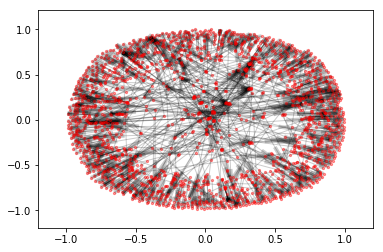

In [95]:
G = nx.DiGraph()
G.add_edges_from(edge_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 5, alpha = 0.4)
nx.draw_networkx_edges(G, pos, edgelist=edge_list, arrows=True, alpha = 0.2)
plt.figure(num=None, figsize=(100, 100), dpi=80)
plt.show()

## See specific songs

In [63]:
import sys
!{sys.executable} -m pip install lyricsgenius
!{sys.executable} -m pip install spotipy
!{sys.executable} -m pip install selenium
import pandas as pd
import requests
import lyricsgenius as genius
import spotipy
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [67]:
genius_client_id = 'Qeii-UKMUUwsAYCuuemsF7CZk7R2bFDhjP1FMkqpozASvYsA4wQDlLmd2JFM3Vhm'
genius_secret_id = 'fWhV7VtwAL-5D32Ga9Y0Kyh_VFEo7XK0Jf8-3RMcZ5EoMXqsDpmFWFFPyobnibfMXJuJ-GZe69YEuXR-36VGAA'
genius_client_access_token = '1QVL91jZbgdOIhvYhqKku_zkFDf6MHEyLpXEITHU2tE2HGvAqYIPInTrQaWcInD7'
app_website_url = 'http://cis545genius.com'
redirect_uri = 'cis545genius.com'
base_url = 'https://api.genius.com'
driver_path = '/Users/arnabsarker/Downloads/chromedriver.exe'
# driver_path = "/mnt/c/Users/jeffr/Downloads/chromedriver_win32/chromedriver.exe"
artist_url = 'https://www.ranker.com/crowdranked-list/the-greatest-rappers-of-all-time'
page_downs = 0
api = genius.Genius(genius_client_access_token)

In [68]:
origin_df = pd.read_csv('spotify.csv')
spotify_df = origin_df[['genius_id','track_popularity', 'song', 'artist']]

In [69]:
combined_auth_df = auth_df.merge(spotify_df, how='left', left_on='song', right_on='genius_id')
combined_hub_df = hub_df.merge(spotify_df, how='left', left_on='song', right_on='genius_id')
combined_auth_df

,index,song_x,auth,genius_id,track_popularity,song_y,artist
0,0,29.0,0.022258,NaN,NaN,NaN,NaN
1,1,43.0,0.025770,43.0,79.0,Juicy,The Notorious B.I.G.
2,2,46.0,0.020545,NaN,NaN,NaN,NaN
3,3,51.0,0.020718,51.0,51.0,Ten Crack Commandments,The Notorious B.I.G.
4,4,57.0,0.020545,NaN,NaN,NaN,NaN
5,5,66.0,0.020545,NaN,NaN,NaN,NaN
6,6,68.0,0.021893,NaN,NaN,NaN,NaN
7,7,70.0,0.020895,NaN,NaN,NaN,NaN
8,8,87.0,0.020718,NaN,NaN,NaN,NaN
9,9,89.0,0.021450,89.0,66.0,N.Y. State of Mind,Nas


In [86]:
def call_api_for_song_name(row):
    try:
        song_id = row[1]
        base_url = 'https://api.genius.com'
        search_url = base_url + '/songs/' + str(song_id)
        params = {}
        response = requests.get(search_url, params=params, headers=headers)
        json = response.json()
        title = json['response']['song']['title']
        artist = json['response']['song']['primary_artist']['name']
        row[5] = title
        row[6] = artist
        return row
    except KeyError as e:
        return row

In [89]:
headers = {'Authorization': 'Bearer %s' % genius_client_access_token}
combined_auth_df = combined_auth_df.sort_values(by=['auth'], ascending=0)

top_auth_df = combined_auth_df.head(20)

top_auth_df = top_auth_df.apply(call_api_for_song_name, axis = 1)

In [90]:
top_auth_df

,index,song_x,auth,genius_id,track_popularity,song_y,artist
124,124,4015.0,0.495005,NaN,NaN,Eazy Duz It,Eazy-E
86,86,1807.0,0.047026,NaN,NaN,La Di Da Di,Doug E. Fresh & The Get Fresh Crew
577,577,380408.0,0.035698,380408.0,47.0,Boyz-n-the Hood,Eazy-E
122,122,3897.0,0.035698,NaN,NaN,The Show,Doug E. Fresh & The Get Fresh Crew
416,416,100617.0,0.035547,NaN,NaN,Sing a Simple Song,Sly and the Family Stone
957,957,2428317.0,0.032513,NaN,NaN,Impeach The President,The Honey Drippers (’70s Funk)
492,492,167456.0,0.032513,NaN,NaN,Funky Drummer,James Brown
313,313,54025.0,0.030996,NaN,NaN,Funky Worm,Ohio Players
98,98,2315.0,0.030034,NaN,NaN,Mama Said Knock You Out,LL Cool J
364,364,71969.0,0.029479,NaN,NaN,Funky President (People It's Bad),James Brown


In [91]:
headers = {'Authorization': 'Bearer %s' % genius_client_access_token}
combined_hub_df = combined_hub_df.sort_values(by=['hub'], ascending=0)

top_hub_df = combined_hub_df.head(20)

top_hub_df = top_hub_df.apply(call_api_for_song_name, axis = 1)

In [92]:
top_hub_df

,index,song_x,hub,genius_id,track_popularity,song_y,artist
149,149,4015.0,0.709605,NaN,NaN,Eazy Duz It,Eazy-E
75,75,761.0,0.038246,761.0,64.0,No Vaseline,Ice Cube
156,156,4731.0,0.037483,NaN,NaN,Time 4 Sum Aksion,Redman
161,161,5047.0,0.036692,5047.0,42.0,100 Miles and Runnin',N.W.A
127,127,2315.0,0.035305,NaN,NaN,Mama Said Knock You Out,LL Cool J
262,262,35694.0,0.031754,NaN,NaN,8 Ball,N.W.A
263,263,35705.0,0.031278,NaN,NaN,8 Ball (Remix),N.W.A
155,155,4579.0,0.031278,NaN,NaN,Time to Get Ill,Beastie Boys
223,223,26909.0,0.029304,NaN,NaN,Jump,Kris Kross
160,160,4886.0,0.029270,4886.0,59.0,Gangsta Gangsta,N.W.A


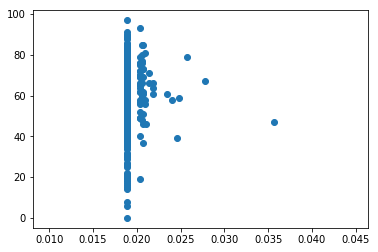

In [50]:
plt.scatter(combined_auth_df['auth'], combined_auth_df['track_popularity'])

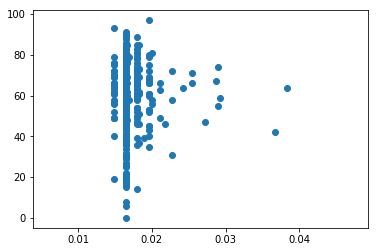

In [51]:
plt.scatter(combined_hub_df['hub'], combined_hub_df['track_popularity'])

In [96]:
combined_hub_df['hub'].corr(combined_hub_df['track_popularity'])

-0.0093188186996125948

In [97]:
combined_auth_df['auth'].corr(combined_auth_df['track_popularity'])

0.0022700650189292895